In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

with open('/content/drive/My Drive/Upwork/Unsupervised_learning/x_train.pkl', 'rb') as handle:
    X_train = pickle.load(handle)

with open('/content/drive/My Drive/Upwork/Unsupervised_learning/x_test.pkl', 'rb') as handle:
    X_test = pickle.load(handle)

In [ ]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def preprocess_data(X, Y):
    X = K.applications.densenet.preprocess_input(X)
    Y = K.utils.to_categorical(Y)
    return X, Y

(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
# preprocess the data using the application's preprocess_input method and convert the labels to one-hot encodings
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_test)
X_embedded.shape

(10000, 2)

In [ ]:
y1=np.argmax(y_test,axis=1)
y1.shape

(10000,)

In [ ]:
y1[:2]

array([3, 8])

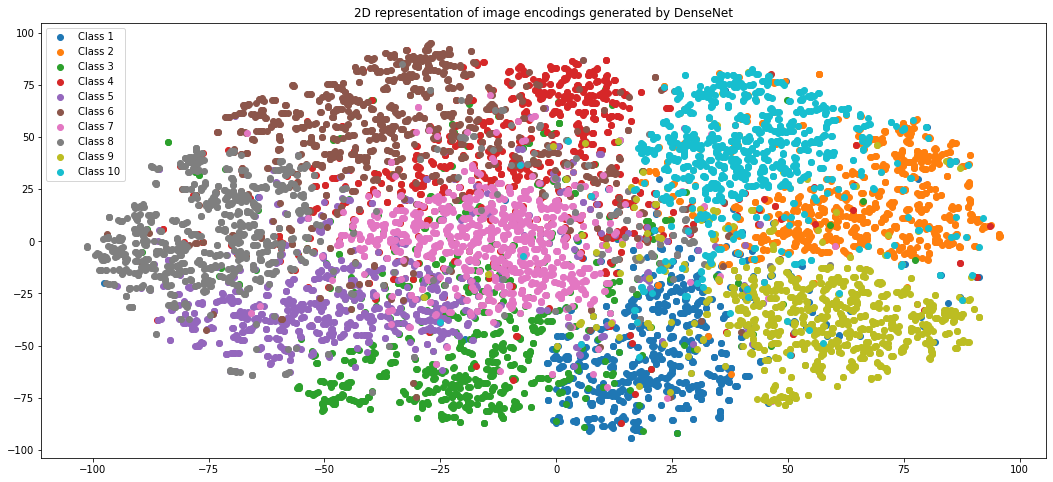

In [ ]:
plt.figure(figsize=(18,8))
i=1
for val in set(y1):
  inds=[j for j in range(len(y1)) if y1[j]==val] # all indices
  X1=X_embedded[inds]
  plt.scatter(X1[:,0],X1[:,1],label="Class "+str(i))
  i+=1
plt.legend()
plt.title("2D representation of image encodings generated by DenseNet")
plt.show()

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
X_test.shape

(10000, 1920)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42, max_iter=1000, algorithm='elkan').fit(X_train)

In [ ]:
kmeans.n_iter_

44

In [ ]:
kmeans.score(X_test)

-46541752.0

In [ ]:
preds=kmeans.predict(X_test)
preds.shape

(10000,)

In [ ]:
y1=np.argmax(y_test,axis=1)
y1.shape

(10000,)

In [ ]:
preds[:10]

array([3, 5, 2, 6, 0, 0, 5, 0, 3, 5], dtype=int32)

In [ ]:
y1[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [ ]:
correct=0
mapping={}

for i,p in enumerate(preds):
  try:
    if p==mapping[p]:
      correct+=1
  except:
    mapping[p]=y1[i]

print(correct*100/len(y1))

16.46


In [ ]:
from collections import Counter

correct=0
mapping={}

for val in set(y1):
  inds=[i for i in range(len(y1)) if y1[i]==val] # all indices
  p=preds[inds]
  y2=y1[inds]
  counts=dict(Counter(p))

  print("y2: ", y2[:3])
  print("counts: ", counts)
  print("----------------")
  #break

y2:  [0 0 0]
counts:  {6: 699, 5: 15, 2: 169, 1: 8, 9: 42, 3: 19, 4: 44, 0: 2, 8: 2}
----------------
y2:  [1 1 1]
counts:  {5: 905, 4: 74, 2: 7, 3: 8, 0: 1, 9: 2, 7: 1, 6: 1, 1: 1}
----------------
y2:  [2 2 2]
counts:  {8: 27, 3: 85, 1: 643, 9: 145, 0: 38, 6: 44, 7: 8, 2: 6, 5: 3, 4: 1}
----------------
y2:  [3 3 3]
counts:  {3: 791, 0: 76, 9: 53, 1: 15, 7: 27, 5: 2, 4: 12, 2: 7, 6: 4, 8: 13}
----------------
y2:  [4 4 4]
counts:  {9: 325, 3: 70, 8: 497, 2: 11, 0: 48, 1: 43, 4: 3, 5: 2, 6: 1}
----------------
y2:  [5 5 5]
counts:  {3: 429, 7: 487, 8: 37, 0: 16, 9: 18, 1: 11, 2: 2}
----------------
y2:  [6 6 6]
counts:  {0: 636, 9: 273, 3: 49, 6: 10, 1: 22, 8: 6, 5: 1, 7: 1, 4: 1, 2: 1}
----------------
y2:  [7 7 7]
counts:  {3: 177, 8: 721, 4: 14, 6: 5, 7: 19, 9: 21, 1: 24, 2: 16, 0: 1, 5: 2}
----------------
y2:  [8 8 8]
counts:  {5: 18, 2: 907, 1: 7, 6: 30, 9: 5, 3: 15, 4: 16, 8: 1, 0: 1}
----------------
y2:  [9 9 9]
counts:  {4: 922, 6: 6, 5: 40, 2: 19, 9: 7, 3: 4, 1: 1, 8: 1}
--

In [ ]:
mapping={
    0:6,
    1:5,
    2:7,
    3:9,
    4:4,
    5:0,
    6:3,
    7:8,
    8:1,
    9:2
}
correct=699+905+643+791+497+429+636+721+907+922
print("accuracy: ", correct*100/len(y1))

accuracy:  71.5


In [ ]:
#with densenet
mapping={
    0:6,
    1:5,
    2:7,
    3:9,
    4:4,
    5:0,
    6:3,
    7:8,
    8:1,
    9:2
}
correct=698+904+643+787+324+479+640+718+907+922
print("accuracy: ", correct/len(y1))

accuracy:  0.7022
